# IRIS CLASSIFICATION - FINAL PREDICTION

## Importing Librarires

In [1]:
import joblib as jb
feature_selection=jb.load('files/train/model/feature_selected_model.pkl')
model=jb.load('files/train/model/svc.pkl')
min_max_scaled=jb.load('files/train/model/train_min_scaled_model.pkl')
std_scaled=jb.load('files/train/model/train_std_model.pkl')
encode=jb.load('files/train/model/train_encode_model.pkl')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
def flow(x_path,y_path):
    
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    
    #scaling
    #minmax
    min_max_data=min_max_scaled.transform(x_test)
    min_max=pd.DataFrame(min_max_data,columns=x_test.columns)
    #std
    std_data=std_scaled.transform(min_max)
    std=pd.DataFrame(std_data,columns=min_max.columns)
    
    #encoding
    encode_data=encode.transform(y_test)
    y_test_encode=pd.DataFrame(encode_data,columns=['Species'])
    
    #feature selection
    feature_selected=std[feature_selection]
    
    #predict
    y_pred=pd.DataFrame(model.predict(feature_selected))
    
    #metrics
    report=classification_report(y_pred,y_test_encode)
    cm=confusion_matrix(y_pred,y_test_encode)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,cm,disp

In [4]:
y_pred,report,cm,disp=flow('test data/x.csv','test data/y.csv')

In [5]:
y_pred

,0
0,1
1,2
2,2
3,1
4,0
5,2
6,1
7,0
8,0
9,1


In [6]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



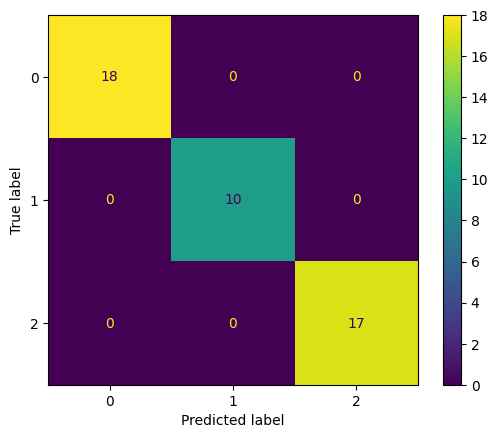

In [7]:
disp.plot()